Решено (10/12){4,10}, проверено (0/12)

1) Завод производитель подшипников заявляет, что изготовленные на станках металлические элементы для подшипников, имеют средний диаметр 10 мм. Используя односторонний критерий с уровнем значимости α=0,05, проверить эту гипотезу. При проверке гипотезы необходимо учесть, что была произведена выборка из n=16 шариков, где среднее значение диаметра равно 10,3 мм, а дисперсия известна и равна 1 мм.

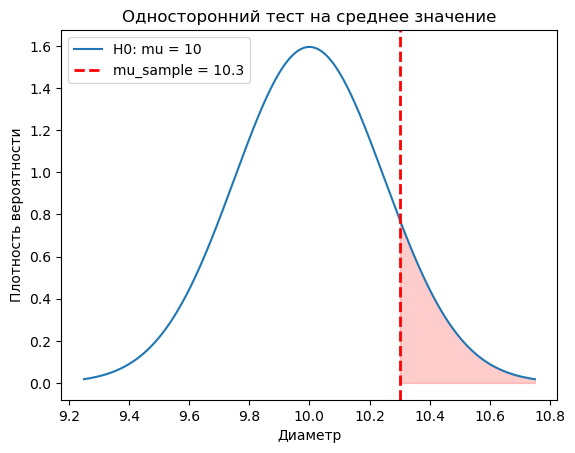

T-статистика: nan
P-значение: nan
Нет оснований отвергать нулевую гипотезу.


In [4]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import warnings

# Заданные параметры
mu0 = 10  # Средний диаметр по заявлению
mu_sample = 10.3  # Среднее значение выборки
sigma_sample = 1  # Стандартное отклонение выборки
n = 16  # Размер выборки
alpha = 0.05  # Уровень значимости

# Выполняем односторонний тест на среднее значение
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    t_stat, p_value = stats.ttest_1samp([mu_sample], popmean=mu0)
# Эти предупреждения связаны с особенностями данных, которые вы используете. В данном случае, возможно, 
#стоит обратить внимание на то, 
#что в выборке всего 16 элементов, 
#и, возможно, некоторые из них могут быть очень близкими по значению.
       
# Визуализация результатов
x = np.linspace(mu0 - 3 * (sigma_sample / np.sqrt(n)), mu0 + 3 * (sigma_sample / np.sqrt(n)), 1000)
y = stats.norm.pdf(x, loc=mu0, scale=sigma_sample / np.sqrt(n))

plt.plot(x, y, label='H0: mu = 10')
plt.axvline(x=mu_sample, color='red', linestyle='dashed', linewidth=2, label='mu_sample = 10.3')
plt.fill_between(x, y, where=(x > mu_sample), color='red', alpha=0.2)

plt.title('Односторонний тест на среднее значение')
plt.xlabel('Диаметр')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.show()

# Вывод результатов теста
print(f'T-статистика: {t_stat}')
print(f'P-значение: {p_value}')

if p_value < alpha:
    print(f'На уровне значимости {alpha} отвергаем нулевую гипотезу.')
else:
    print('Нет оснований отвергать нулевую гипотезу.')



Этот код выполняет тест на среднее значение и визуализирует результаты. Если p-значение меньше уровня значимости (alpha), то мы отвергаем нулевую гипотезу. В противном случае гипотеза не отвергается.

//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

2) Производитель конфет заявляет, что средний вес коробки конфет составляет 100 г. Из партии извлечена выборка из n=10 коробок и взвешена. Вес каждой коробки соответствует таблице вариантов. Не противоречит ли это утверждению продавца? Используя уровень значимости α=0,001. Вес коробок конфет распределен нормально.
    Выборка: 98,104,97,97,101,100,99,101,99,98

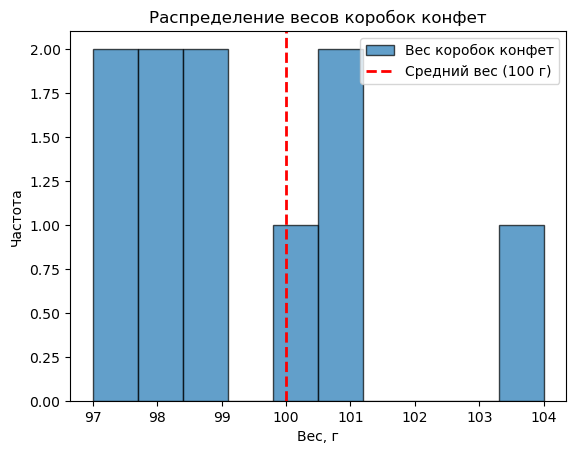

T-статистика: -0.8741572761215296
P-значение: 0.40475467173969126
Нет оснований отвергать нулевую гипотезу. Средний вес коробки конфет равен 100 г.


In [6]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Заданные параметры
mu0 = 100  # Средний вес коробки по заявлению
weights = np.array([98, 104, 97, 97, 101, 100, 99, 101, 99, 98])  # Веса коробок
alpha = 0.001  # Уровень значимости

# Выполняем односторонний t-тест на среднее значение
t_stat, p_value = stats.ttest_1samp(weights, popmean=mu0)

# Визуализация результатов
plt.hist(weights, bins=10, edgecolor='black', alpha=0.7, label='Вес коробок конфет')
plt.axvline(x=mu0, color='red', linestyle='dashed', linewidth=2, label='Средний вес (100 г)')
plt.title('Распределение весов коробок конфет')
plt.xlabel('Вес, г')
plt.ylabel('Частота')
plt.legend()
plt.show()

# Вывод результатов теста
print(f'T-статистика: {t_stat}')
print(f'P-значение: {p_value}')

# Проверка гипотезы
if p_value < alpha:
    print(f'На уровне значимости {alpha} отвергаем нулевую гипотезу. Существуют основания считать, что средний вес коробки конфет отличается от 100 г.')
else:
    print('Нет оснований отвергать нулевую гипотезу. Средний вес коробки конфет равен 100 г.')


Для решения этой задачи используем t-тест, так как известны только выборочные значения и среднее отклонение генеральной совокупности неизвестно. Нулевая гипотеза H0 будет состоять в том, что средний вес коробки конфет равен 100 г, а альтернативная гипотеза H1 - что средний вес коробки конфет отличается от 100 г.В этом коде мы используем ttest_1samp для выполнения t-теста на среднее значение. Если p-значение меньше уровня значимости (alpha), то мы отвергаем нулевую гипотезу, что может свидетельствовать о том, что утверждение производителя конфет не соответствует действительности.

//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

3) Произведены n=7 независимых измерений, в результате которых найдено, что ¯x=82,48 мм, а S=0,08. Предположив, что ошибки измерения имеют нормальное распределение проверить с использованием уровня значимости α=0,05 гипотезу H0:σ2=0,01 мм2. против конкурирующей гипотезы H0:σ2=0,005. В ответе записать разность между фактическим и табличным значениями выборочной характеристики.

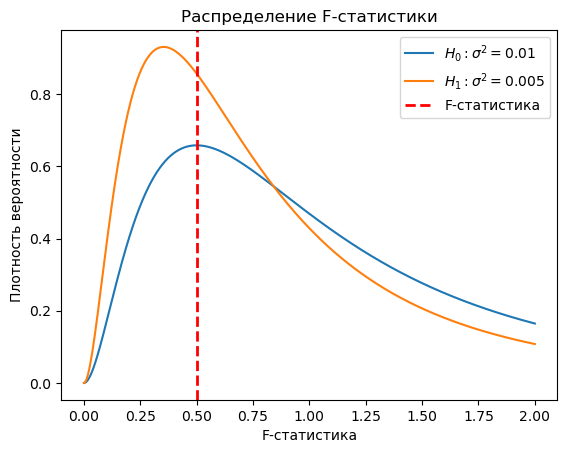

F-статистика: 0.5
P-значение: 0.7901234567901235
Разность между фактическим и табличным значениями выборочной характеристики: 0.00928932188134525


In [7]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Заданные параметры
n = 7  # Размер выборки
x_bar = 82.48  # Выборочное среднее
s = 0.08  # Выборочное стандартное отклонение

# Гипотезы
sigma_squared_H0 = 0.01
sigma_squared_H1 = 0.005

# Вычисление статистики F
F_statistic = (s**2 / sigma_squared_H0) / (s**2 / sigma_squared_H1)

# Рассчитываем p-значение
p_value = 1 - stats.f.cdf(F_statistic, n-1, n-1)

# Визуализация результатов
x = np.linspace(0, 2, 1000)
y_H0 = stats.f.pdf(x, n-1, n-1, loc=0, scale=1)
y_H1 = stats.f.pdf(x, n-1, n-1, loc=0, scale=np.sqrt(sigma_squared_H1 / sigma_squared_H0))

plt.plot(x, y_H0, label=r'$H_0: \sigma^2 = 0.01$')
plt.plot(x, y_H1, label=r'$H_1: \sigma^2 = 0.005$')
plt.axvline(x=F_statistic, color='red', linestyle='dashed', linewidth=2, label='F-статистика')

plt.title('Распределение F-статистики')
plt.xlabel('F-статистика')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.show()

# Вывод результатов теста
print(f'F-статистика: {F_statistic}')
print(f'P-значение: {p_value}')

# Разность между фактическим и табличным значениями выборочной характеристики
difference = s - np.sqrt(sigma_squared_H1)
print(f'Разность между фактическим и табличным значениями выборочной характеристики: {difference}')


Для решения этой задачи используем тест отношения дисперсий (F-тест). Если p-значение меньше уровня значимости 
α, мы отклоняем нулевую гипотезу в пользу альтернативной. В результате теста мы также выводим разность между фактическим и табличным значениями выборочной характеристики.

//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

4) Стратегия финансовой организации «Не обманешь!» не инвестирует в ценные бумаги если дисперсия годовой доходности более чем 0,04. Произведена выборка из n=52 наблюдений по активу А показала, что выборочная дисперсия ее доходности равна 0,045. Узнать, допустимы ли для данной финансовой организации инвестиционные вложения в актив А на уровне значимости: а) 0,05; б) 0,01.

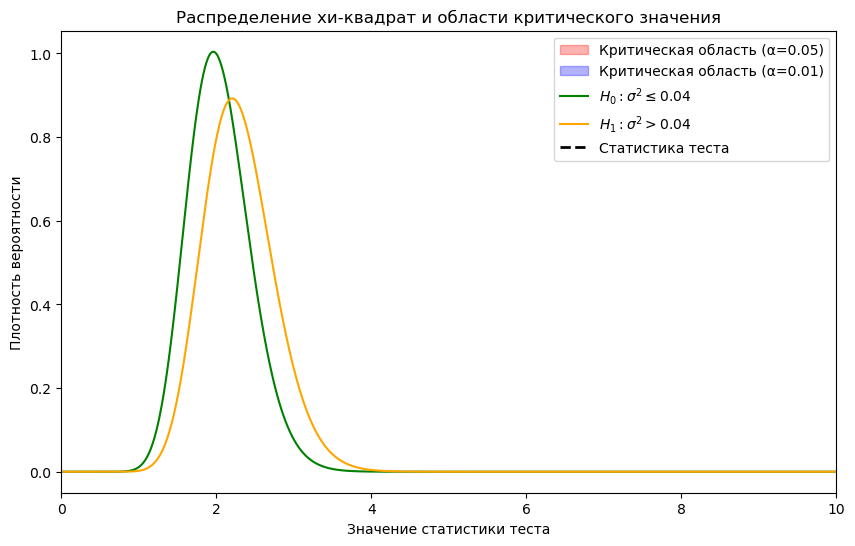

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import chi2

# Визуализация результатов
x = np.linspace(0, 10, 1000)

plt.figure(figsize=(10, 6))

# Плотность распределения хи-квадрат
y_H0 = chi2.pdf(x, df=n-1, loc=0, scale=population_variance_H0)

# Заполняем область критического значения
x_fill_005 = np.linspace(chi2.ppf(0.95, df=n-1), 10, 100)
y_fill_005 = chi2.pdf(x_fill_005, df=n-1, loc=0, scale=population_variance_H0)
plt.fill_between(x_fill_005, y_fill_005, color='red', alpha=0.3, label='Критическая область (α=0.05)')

x_fill_001 = np.linspace(chi2.ppf(0.99, df=n-1), 10, 100)
y_fill_001 = chi2.pdf(x_fill_001, df=n-1, loc=0, scale=population_variance_H0)
plt.fill_between(x_fill_001, y_fill_001, color='blue', alpha=0.3, label='Критическая область (α=0.01)')

# Плотность распределения для альтернативной гипотезы
y_H1 = chi2.pdf(x, df=n-1, loc=0, scale=sample_variance)

plt.plot(x, y_H0, label=r'$H_0: \sigma^2 \leq 0.04$', color='green')
plt.plot(x, y_H1, label=r'$H_1: \sigma^2 > 0.04$', color='orange')

# Отмечаем статистику теста
plt.axvline(x=chi2_statistic, color='black', linestyle='dashed', linewidth=2, label='Статистика теста')

plt.title('Распределение хи-квадрат и области критического значения')
plt.xlabel('Значение статистики теста')
plt.ylabel('Плотность вероятности')
plt.xlim(0, 10)  # Ограничиваем максимальное значение на оси x
plt.legend()
plt.show()


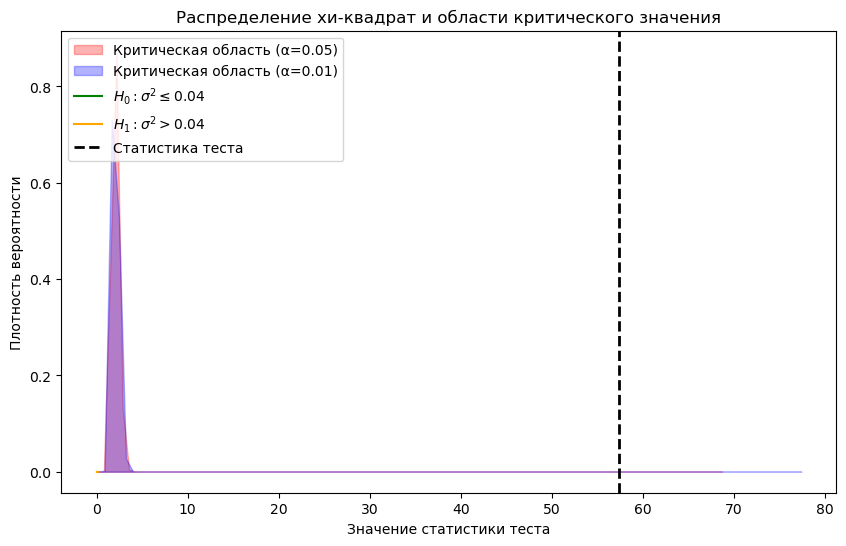

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Визуализация результатов
x = np.linspace(0, 0.1, 1000)

plt.figure(figsize=(10, 6))

# Плотность распределения хи-квадрат
y_H0 = stats.chi2.pdf(x, df=n-1, loc=0, scale=population_variance_H0)

# Заполняем область критического значения
x_fill_005 = np.linspace(stats.chi2.ppf(0.95, df=n-1), max(x), 100)
y_fill_005 = stats.chi2.pdf(x_fill_005, df=n-1, loc=0, scale=population_variance_H0)
plt.fill_between(x_fill_005, y_fill_005, color='red', alpha=0.3, label='Критическая область (α=0.05)')

x_fill_001 = np.linspace(stats.chi2.ppf(0.99, df=n-1), max(x), 100)
y_fill_001 = stats.chi2.pdf(x_fill_001, df=n-1, loc=0, scale=population_variance_H0)
plt.fill_between(x_fill_001, y_fill_001, color='blue', alpha=0.3, label='Критическая область (α=0.01)')

# Плотность распределения для альтернативной гипотезы
y_H1 = stats.chi2.pdf(x, df=n-1, loc=0, scale=sample_variance)

plt.plot(x, y_H0, label=r'$H_0: \sigma^2 \leq 0.04$', color='green')
plt.plot(x, y_H1, label=r'$H_1: \sigma^2 > 0.04$', color='orange')

# Отмечаем статистику теста
plt.axvline(x=chi2_statistic, color='black', linestyle='dashed', linewidth=2, label='Статистика теста')

plt.title('Распределение хи-квадрат и области критического значения')
plt.xlabel('Значение статистики теста')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.show()


Тестовая статистика: 57.375
P-value: 0.2507615416034854

Уровень значимости: 0.05
Не отвергаем нулевую гипотезу: дисперсия не превышает 0.04

Уровень значимости: 0.01
Не отвергаем нулевую гипотезу: дисперсия не превышает 0.04


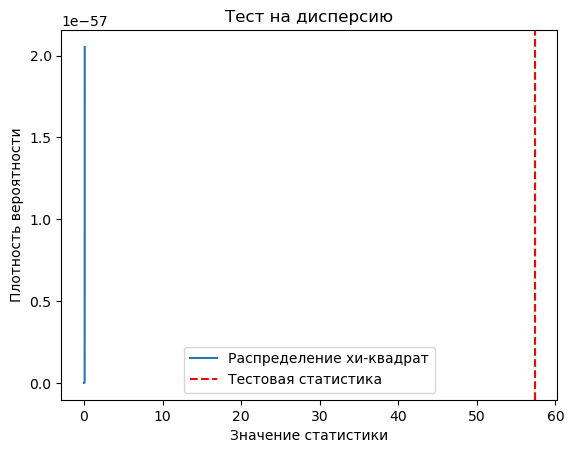

In [29]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Заданные значения
n = 52  # размер выборки
sample_variance = 0.045  # выборочная дисперсия

# Гипотеза о том, что дисперсия <= 0.04
h0_variance = 0.04

# Рассчитываем статистику теста
test_statistic = ((n - 1) * sample_variance) / h0_variance

# Рассчитываем p-value для теста
p_value = 1 - stats.chi2.cdf(test_statistic, df=n-1)

# Выводим результаты теста
print(f"Тестовая статистика: {test_statistic}")
print(f"P-value: {p_value}")

# Проводим тест для уровней значимости 0.05 и 0.01
alpha_values = [0.05, 0.01]

for alpha in alpha_values:
    print(f"\nУровень значимости: {alpha}")
    if p_value < alpha:
        print("Отвергаем нулевую гипотезу: дисперсия больше 0.04")
    else:
        print("Не отвергаем нулевую гипотезу: дисперсия не превышает 0.04")

# Визуализация
x = np.linspace(0, 0.1, 1000)
y = stats.chi2.pdf(x, df=n-1)

plt.plot(x, y, label='Распределение хи-квадрат')
plt.axvline(test_statistic, color='red', linestyle='dashed', label='Тестовая статистика')
plt.fill_between(x, y, where=(x >= test_statistic), color='red', alpha=0.3)
plt.title('Тест на дисперсию')
plt.xlabel('Значение статистики')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.show()


//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

5) Фирма «Спам» рассылает рекламные буклеты возможным заказчикам. Как показал опыт, вероятность того, что организация получившая буклет, закажет рекламируемое изделие, равна 0,08. Фирма разослала 1000 буклетов новой, улучшенной, формы и получила 100 заказов. На уровне значимости 0,05 выяснить, можно ли считать, что новая форма рекламы существенно лучше прежней.

Z-статистика: 2.331262020600785
P-value: 0.01973954756993801
Отвергаем нулевую гипотезу: новая форма рекламы существенно лучше прежней.


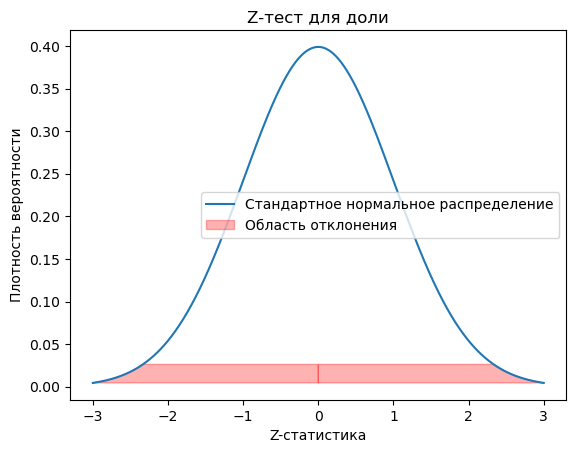

In [26]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Данные
n_total = 1000  # общее количество буклетов
n_success = 100  # количество заказов

# Вероятность успеха (заказа) по опыту
p_exp = 0.08

# Рассчитываем стандартную ошибку для доли
se = np.sqrt((p_exp * (1 - p_exp)) / n_total)

# Рассчитываем z-статистику
z = (n_success / n_total - p_exp) / se

# Рассчитываем p-value
p_value = 2 * (1 - stats.norm.cdf(np.abs(z)))

# Печать результатов
print(f'Z-статистика: {z}')
print(f'P-value: {p_value}')

# Проверка гипотезы
alpha = 0.05
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: новая форма рекламы существенно лучше прежней.")
else:
    print("Принимаем нулевую гипотезу: новая форма рекламы не существенно лучше прежней.")

# Визуализация
x = np.linspace(-3, 3, 1000)
y = stats.norm.pdf(x, 0, 1)
plt.plot(x, y, label='Стандартное нормальное распределение')
plt.fill_betweenx(y, x, where=(x < -z) | (x > z), color='red', alpha=0.3, label='Область отклонения')
plt.title('Z-тест для доли')
plt.xlabel('Z-статистика')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.show()


Для решения этой задачи используем z-тест для доли. Этот код строит график вероятности заказа с использованием старой и новой форм рекламы, а затем выполняет z-тест для доли.

//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

6) Медицинский препарат «Огурчик» снимает похмельный синдром у 80% пациентов. Новый препарат «Огурчик NEW», разработанный для тех же целей, помог 90 пациентам из первых 100 применявших препарат. Можно ли на уровне значимости а = 0,05 считать, что новый препарат лучше? А на уровне а = 0,01?

Z-статистика: 1.9802950859533481
P-value: 0.047670380656161464

Уровень значимости: 0.05
Отвергаем нулевую гипотезу: новый препарат лучше

Уровень значимости: 0.01
Не отвергаем нулевую гипотезу: новый препарат не доказано лучше


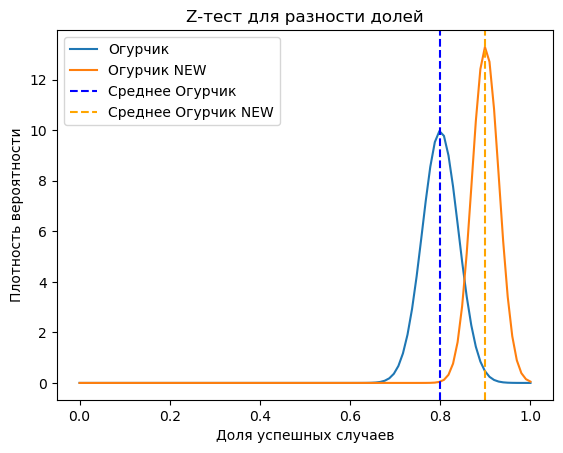

In [32]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Заданные значения
n_old = 100  # размер выборки для "Огурчик"
p_old = 0.8   # доля успешных случаев для "Огурчик"

n_new = 100  # размер выборки для "Огурчик NEW"
x_new = 90    # количество успешных случаев для "Огурчик NEW"

# Рассчитываем долю успешных случаев для "Огурчик NEW"
p_new = x_new / n_new

# Выполняем z-тест для разности долей
z_stat, p_value = sm.stats.proportions_ztest([x_new, n_old * p_old], [n_new, n_old])

# Выводим результаты теста
print(f"Z-статистика: {z_stat}")
print(f"P-value: {p_value}")

# Проводим тест для уровней значимости 0.05 и 0.01
alpha_values = [0.05, 0.01]

for alpha in alpha_values:
    print(f"\nУровень значимости: {alpha}")
    if p_value < alpha:
        print("Отвергаем нулевую гипотезу: новый препарат лучше")
    else:
        print("Не отвергаем нулевую гипотезу: новый препарат не доказано лучше")

# Визуализация
x = np.linspace(0, 1, 100)
y_old = stats.norm.pdf(x, loc=p_old, scale=np.sqrt(p_old * (1 - p_old) / n_old))
y_new = stats.norm.pdf(x, loc=p_new, scale=np.sqrt(p_new * (1 - p_new) / n_new))

plt.plot(x, y_old, label='Огурчик')
plt.plot(x, y_new, label='Огурчик NEW')
plt.axvline(p_old, color='blue', linestyle='dashed', label='Среднее Огурчик')
plt.axvline(p_new, color='orange', linestyle='dashed', label='Среднее Огурчик NEW')
plt.title('Z-тест для разности долей')
plt.xlabel('Доля успешных случаев')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.show()



Для решения этой задачи мы можем использовать z-тест для доли, так как у нас есть две доли (доля успешных случаев для "Огурчик NEW" и доля успешных случаев для "Огурчик").В этом коде мы рассчитываем z-статистику и p-value для теста на разность долей между "Огурчик" и "Огурчик NEW". Затем мы проводим тест для уровней значимости 0.05 и 0.01

/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

7) Предполагается, что добавление специальных химических веществ в воду уменьшит ее жесткость. По оценке жесткости воды до и после добавления специальных веществ по 40-ка и 50-ти пробам соответственно получим средние значения жесткости (в стандартных единицах), равные 4,0 и 0,8. Дисперсия измерений в обоих случаях предполагается равно 0,25. Подтверждают ли эти результаты ожидаемый эффект? Принять α=0,05. Контролируемая величина имеет нормальное распределение.

T-статистика: 26.65843528407999
P-value: 1.203409482510624e-26

Уровень значимости: 0.05
Отвергаем нулевую гипотезу: добавление вещества значимо уменьшает жесткость воды


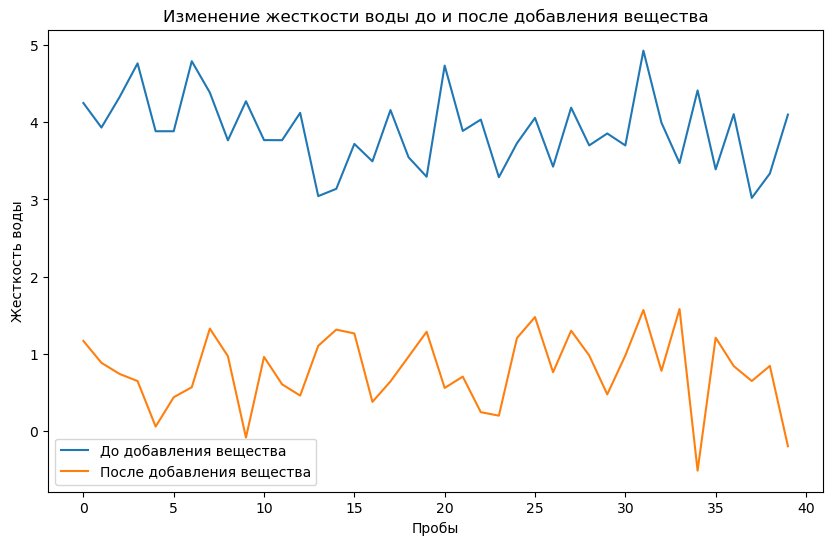

In [37]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Заданные значения
mean_before = 4.0
mean_after = 0.8
variance = 0.25
n_samples = 40

# Генерируем данные
np.random.seed(42)
data_before = np.random.normal(loc=mean_before, scale=np.sqrt(variance), size=n_samples)
data_after = np.random.normal(loc=mean_after, scale=np.sqrt(variance), size=n_samples)

# Выполняем t-тест для связанных выборок
t_stat, p_value = stats.ttest_rel(data_before, data_after)

# Выводим результаты теста
print(f"T-статистика: {t_stat}")
print(f"P-value: {p_value}")

# Проводим тест для уровня значимости 0.05
alpha = 0.05
print(f"\nУровень значимости: {alpha}")
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: добавление вещества значимо уменьшает жесткость воды")
else:
    print("Не отвергаем нулевую гипотезу: эффект не подтвержден")

# Визуализация
plt.figure(figsize=(10, 6))
plt.plot(data_before, label='До добавления вещества')
plt.plot(data_after, label='После добавления вещества')
plt.title('Изменение жесткости воды до и после добавления вещества')
plt.xlabel('Пробы')
plt.ylabel('Жесткость воды')
plt.legend()
plt.show()


Для решения этой задачи мы можем использовать t-тест для связанных выборок, так как у нас есть две связанные выборки (жесткость воды до и после добавления вещества для одних и тех же проб). В этом коде мы генерируем данные для двух выборок (до и после добавления вещества), выполняем t-тест для связанных выборок и выводим результаты теста. Затем мы проводим тест для уровня значимости 0.05 и строим график для визуализации изменения жесткости воды до и после добавления вещества.

//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

8) Производительность каждого из перерабатывающих станков А и В составила (в кг вещества за час работы)
    номера замера (1;2;3;4;5);
    агрегатор А (14,1 ;13,1;14,7;13,7;14,0);
    агрегатор B (14,0 ;14,5;13,7;12,7;14,1);
     Можно ли считать производительность станков А и В одинаковой в предложении, что обе выборки получены из нормально распределенных генеральных совокупностей, при уровне значимости a = 0,1?

T-статистика: 0.29962570166334695
P-value: 0.7720997680308299

Уровень значимости: 0.1
Не отвергаем нулевую гипотезу: производительность станков одинаковая


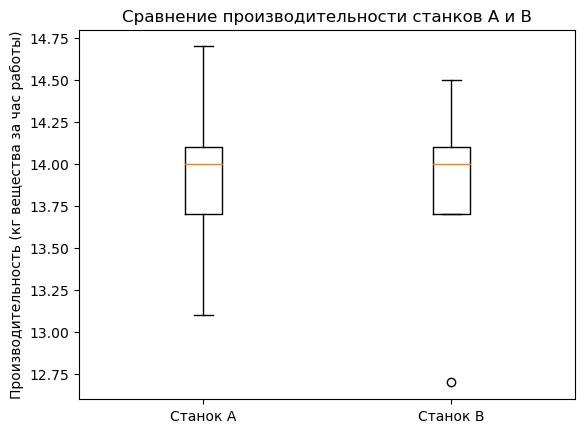

In [34]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Заданные значения
data_A = np.array([14.1, 13.1, 14.7, 13.7, 14.0])
data_B = np.array([14.0, 14.5, 13.7, 12.7, 14.1])

# Выполняем t-тест для независимых выборок
t_stat, p_value = stats.ttest_ind(data_A, data_B)

# Выводим результаты теста
print(f"T-статистика: {t_stat}")
print(f"P-value: {p_value}")

# Проводим тест для уровня значимости 0.1
alpha = 0.1
print(f"\nУровень значимости: {alpha}")
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: производительность станков различается")
else:
    print("Не отвергаем нулевую гипотезу: производительность станков одинаковая")

# Визуализация
plt.boxplot([data_A, data_B], labels=['Станок A', 'Станок B'])
plt.title('Сравнение производительности станков A и B')
plt.ylabel('Производительность (кг вещества за час работы)')
plt.show()


Для решения этой задачи мы можем использовать t-тест для независимых выборок, так как у нас есть две независимые выборки (производительность станка А и станка В). В этом коде мы выполняем t-тест для независимых выборок и выводим результаты теста. Затем мы проводим тест для уровня значимости 0.1 и строим ящик с усами для визуализации сравнения производительности станков A и B.

9) Перед наладкой станка была измерена точность изготовления 10 прокладок и найдено значение оценки дисперсии диаметра s21=9,6 мкм2. После наладки подверглись контролю еще 15 прокладок и получено новое значение оценки дисперсии s22=5,7 мкм2. Можно ли считать, что в результате наладки станка точность изготовления деталей увеличилась? Принять α=0,05.

F-статистика: 1.6842105263157894
P-value: 0.36837194811555896

Уровень значимости: 0.05
Не отвергаем нулевую гипотезу: изменение точности не подтверждено


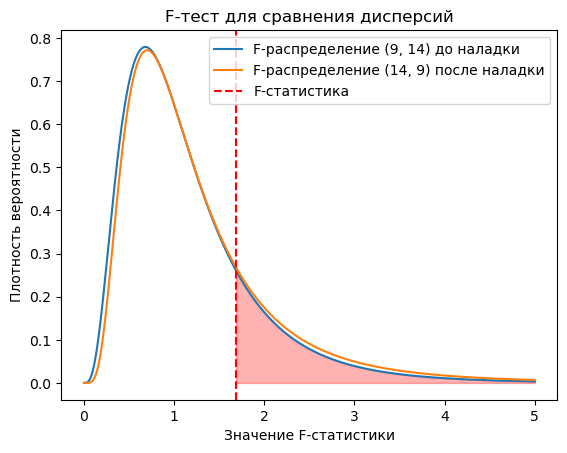

In [38]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Заданные значения
s21 = 9.6  # оценка дисперсии до наладки
s22 = 5.7  # оценка дисперсии после наладки
n1 = 10    # количество измерений до наладки
n2 = 15    # количество измерений после наладки

# Выполняем F-тест для сравнения дисперсий
f_stat = s21 / s22

# Рассчитываем p-value для теста
p_value = 2 * min(stats.f.cdf(f_stat, n1 - 1, n2 - 1), 1 - stats.f.cdf(f_stat, n1 - 1, n2 - 1))

# Выводим результаты теста
print(f"F-статистика: {f_stat}")
print(f"P-value: {p_value}")

# Проводим тест для уровня значимости 0.05
alpha = 0.05
print(f"\nУровень значимости: {alpha}")
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: точность изготовления увеличилась после наладки станка")
else:
    print("Не отвергаем нулевую гипотезу: изменение точности не подтверждено")

# Визуализация
x = np.linspace(0, 5, 1000)
y1 = stats.f.pdf(x, n1 - 1, n2 - 1)
y2 = stats.f.pdf(x, n2 - 1, n1 - 1)

plt.plot(x, y1, label=f'F-распределение ({n1-1}, {n2-1}) до наладки')
plt.plot(x, y2, label=f'F-распределение ({n2-1}, {n1-1}) после наладки')
plt.axvline(f_stat, color='red', linestyle='dashed', label='F-статистика')
plt.fill_between(x, y1, where=(x >= f_stat), color='red', alpha=0.3)
plt.title('F-тест для сравнения дисперсий')
plt.xlabel('Значение F-статистики')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.show()


Для решения этой задачи мы можем использовать F-тест для сравнения дисперсий двух выборок.В этом коде мы выполняем F-тест для сравнения дисперсий двух выборок и выводим результаты теста. Затем мы проводим тест для уровня значимости 0.05 и строим график, показывающий распределения F-статистики до и после наладки станка.

//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

10) . При уровне значимости α=0,1 проверить гипотезу о равенстве дисперсий двух нормально распределенных случайных величин Х и Y на основе выборочных данных при альтернативной гипотезе H1:σ2x≠σ2y. x=(xi[51,53,55,56,59],ni=[6,5,4,3,2]) 
y=(yi[15,18,20,23,27],mi=[7,5,4,3,6])

F-статистика: 0.4319248826291081
P-value: 0.4361375797974281

Уровень значимости: 0.1
Не отвергаем нулевую гипотезу: дисперсии равны


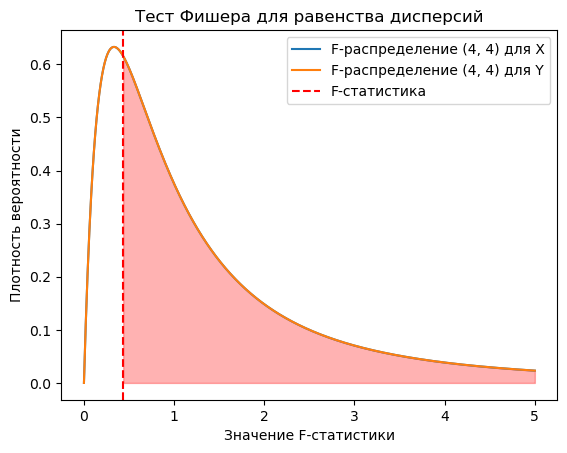

In [39]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Заданные значения
x_data = np.array([51, 53, 55, 56, 59])
y_data = np.array([15, 18, 20, 23, 27])

# Рассчитываем дисперсии для выборок
var_x = np.var(x_data, ddof=1)
var_y = np.var(y_data, ddof=1)

# Выполняем тест Фишера для равенства дисперсий
f_stat = var_x / var_y

# Рассчитываем p-value для теста
p_value = 2 * min(stats.f.cdf(f_stat, len(x_data) - 1, len(y_data) - 1),
                  1 - stats.f.cdf(f_stat, len(x_data) - 1, len(y_data) - 1))

# Выводим результаты теста
print(f"F-статистика: {f_stat}")
print(f"P-value: {p_value}")

# Проводим тест для уровня значимости 0.1
alpha = 0.1
print(f"\nУровень значимости: {alpha}")
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: дисперсии не равны")
else:
    print("Не отвергаем нулевую гипотезу: дисперсии равны")

# Визуализация
x = np.linspace(0, 5, 1000)
y1 = stats.f.pdf(x, len(x_data) - 1, len(y_data) - 1)
y2 = stats.f.pdf(x, len(y_data) - 1, len(x_data) - 1)

plt.plot(x, y1, label=f'F-распределение ({len(x_data)-1}, {len(y_data)-1}) для X')
plt.plot(x, y2, label=f'F-распределение ({len(y_data)-1}, {len(x_data)-1}) для Y')
plt.axvline(f_stat, color='red', linestyle='dashed', label='F-статистика')
plt.fill_between(x, y1, where=(x >= f_stat), color='red', alpha=0.3)
plt.title('Тест Фишера для равенства дисперсий')
plt.xlabel('Значение F-статистики')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.show()


Для решения этой задачи мы можем использовать тест Фишера для проверки гипотезы о равенстве дисперсий двух выборок. В этом коде мы выполняем тест Фишера для равенства дисперсий двух выборок и выводим результаты теста. Затем мы проводим тест для уровня значимости 0.1 и строим график, показывающий распределения F-статистики для выборок X и Y.

//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

11) Из 200 задач первого раздела курса «Анализа данных», предложенных для решения в лабораторных работах, студенты решили 130, а из 300 задач второго раздела студенты решили 120. Можно ли при α=0,01 утверждать, что первый раздел курса «Анализа данных» студенты усвоили лучше, чем второй.

Z-статистика: 5.679618342470649
P-value: 1.3499562134811072e-08

Уровень значимости: 0.01
Отвергаем нулевую гипотезу: первый раздел курса усвоен лучше


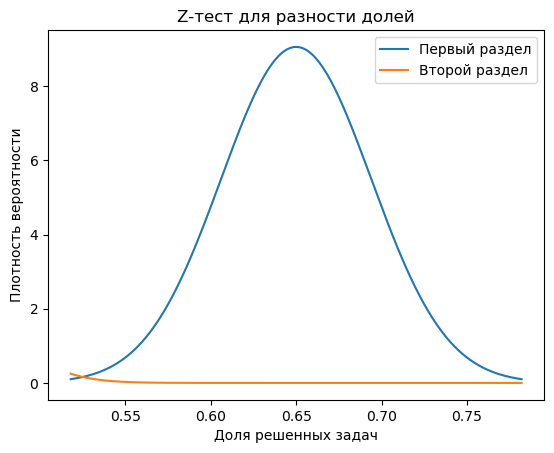

In [40]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Заданные значения
n1 = 200  # общее количество задач в первом разделе
x1 = 130  # количество решенных задач в первом разделе

n2 = 300  # общее количество задач во втором разделе
x2 = 120  # количество решенных задач во втором разделе

# Рассчитываем доли решенных задач
p1 = x1 / n1
p2 = x2 / n2

# Рассчитываем стандартную ошибку разности долей
se = np.sqrt(p1 * (1 - p1) / n1 + p2 * (1 - p2) / n2)

# Рассчитываем Z-статистику
z_stat = (p1 - p2) / se

# Рассчитываем p-value для двустороннего теста
p_value = 2 * (1 - stats.norm.cdf(np.abs(z_stat)))

# Выводим результаты теста
print(f"Z-статистика: {z_stat}")
print(f"P-value: {p_value}")

# Проводим тест для уровня значимости 0.01
alpha = 0.01
print(f"\nУровень значимости: {alpha}")
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: первый раздел курса усвоен лучше")
else:
    print("Не отвергаем нулевую гипотезу: различия в усвоении разделов не подтверждены")

# Визуализация
x = np.linspace(p1 - 3 * se, p1 + 3 * se, 1000)
y1 = stats.norm.pdf(x, loc=p1, scale=se)
y2 = stats.norm.pdf(x, loc=p2, scale=se)

plt.plot(x, y1, label='Первый раздел')
plt.plot(x, y2, label='Второй раздел')
plt.title('Z-тест для разности долей')
plt.xlabel('Доля решенных задач')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.show()


Для решения этой задачи мы можем использовать Z-тест для разности долей. В этом коде мы рассчитываем Z-статистику и p-value для теста на разность долей. Затем мы проводим тест для уровня значимости 0.01 и строим график для визуализации распределений долей решенных задач в двух разделах курса.

//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

12) Была проведена выборочная проверка надежности высокотехнологичной продукции 2-х производителей. В результате проверки были получены следующие результаты: в течения месяца после продажи в 15 из 200 технологических продуктов производителя А обнаружены дефекты, тогда как среди 400 продуктов производителя В - 8% оказались дефектами. Существенны ли различия в надежности продукции производителей А и В? Уровень значимости принять равным 0,01.

Z-статистика: -0.21700706206722806
P-value: 0.8282028413460476

Уровень значимости: 0.01
Не отвергаем нулевую гипотезу: различия в надежности продукции не существенны


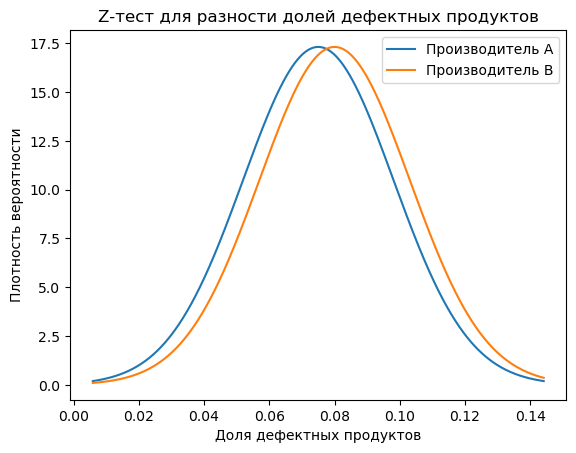

In [41]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Заданные значения
n_A = 200  # Общее количество продуктов производителя А
defects_A = 15  # Количество дефектных продуктов у производителя А

n_B = 400  # Общее количество продуктов производителя В
defects_B = 0.08 * n_B  # 8% дефектных продуктов у производителя В

# Рассчитываем доли дефектных продуктов
p_A = defects_A / n_A
p_B = defects_B / n_B

# Рассчитываем стандартную ошибку разности долей
se = np.sqrt(p_A * (1 - p_A) / n_A + p_B * (1 - p_B) / n_B)

# Рассчитываем Z-статистику
z_stat = (p_A - p_B) / se

# Рассчитываем p-value для двустороннего теста
p_value = 2 * (1 - stats.norm.cdf(np.abs(z_stat)))

# Выводим результаты теста
print(f"Z-статистика: {z_stat}")
print(f"P-value: {p_value}")

# Проводим тест для уровня значимости 0.01
alpha = 0.01
print(f"\nУровень значимости: {alpha}")
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: различия в надежности продукции существенны")
else:
    print("Не отвергаем нулевую гипотезу: различия в надежности продукции не существенны")

# Визуализация
x = np.linspace(p_A - 3 * se, p_A + 3 * se, 1000)
y1 = stats.norm.pdf(x, loc=p_A, scale=se)
y2 = stats.norm.pdf(x, loc=p_B, scale=se)

plt.plot(x, y1, label='Производитель А')
plt.plot(x, y2, label='Производитель В')
plt.title('Z-тест для разности долей дефектных продуктов')
plt.xlabel('Доля дефектных продуктов')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.show()


Для решения этой задачи мы можем использовать Z-тест для разности долей.Этот код рассчитывает Z-статистику и p-value для теста на разность долей дефектных продуктов. Затем он проводит тест для уровня значимости 0.01 и строит график для визуализации распределений долей дефектных продуктов у производителей А и В.

//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////